In [28]:
%matplotlib inline

In [1]:
import pandas as pd
import numpy as np

with open('descriptions.txt') as f:
    lines = f.readlines()
    
print lines[0]
print lines[1]

0   The Infernal Comedy

John Malkovich makes his UMS debut portraying a dead serial killer who returns to the stage to present his autobiography in a public reading. Malkovich appears as part of a theatrical opera of sorts that features a 40-piece chamber orchestra and two sopranos telling the real-life story of Jack Unterweger, a convicted murderer and acclaimed prison poet. Pardoned by the Austrian president Kurt Waldheim in 1990 at the behest of the Viennese literati, Unterweger’s public “rehabilitation” was anything but — within two years, he had been arrested and convicted for the brutal murder of 11 prostitutes in three countries. This gripping performance uses arias and music by Gluck, Vivaldi, Mozart, Beethoven, Boccherini, and Haydn as the counterpoint to Malkovich’s chilling monologue, which shifts between reality and delusion.



In [2]:
df = pd.DataFrame(columns=['title', 'description'])

numDescriptions = 0
index = 0
while numDescriptions < 143:
    title = ' '.join(lines[index].strip().split(' ')[1:])
    description = ''
    index = index + 1
    while not lines[index] == '\n':
        description = description + ' ' + lines[index]
        index = index + 1
    index = index + 1
    
    df.loc[numDescriptions] = [title, description.strip()]
    numDescriptions = numDescriptions + 1
    
df.to_pickle('descriptions.pkl')

print df.head()

                    title                                        description
0     The Infernal Comedy  John Malkovich makes his UMS debut portraying ...
1        Yuja Wang, piano  Chinese pianist Yuja Wang combines the spontan...
2     London Philharmonic  The London Philharmonic returns for its first ...
3        Hamburg Symphony  In 1971, French composer Olivier Messiaen was ...
4    Chicago Symphony Orc  Wind players of the Chicago Symphony come toge...


In [3]:
# Extract bigram matrix

from sklearn.feature_extraction.text import CountVectorizer, ENGLISH_STOP_WORDS

vect = CountVectorizer(ngram_range=(1,2), stop_words = ENGLISH_STOP_WORDS)
X = vect.fit_transform(df.description.values)

In [4]:
# Latent Dirichlet Allocation

from sklearn.decomposition import LatentDirichletAllocation

lda = LatentDirichletAllocation(n_topics=5,max_iter = 100)
y = lda.fit_transform(X)

In [6]:
# Todo:
# 1) Print out what words appear most frequently in each topic
# 2) Scatter plot the documents (in 2-D or 3-D space)
# 3) Gather statistics (e.g. the ratio of student/normal tickets for each topic)
# 4) Try other topic modeling methods (tf-idf, SVD, other flavors of LDA, etc.)

### Print out what words appear most frequently in each topic

In [5]:
# I copy this code from example on sklearn 
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic #%d:" % topic_idx)
        print(", ".join([feature_names[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
    print()

In [6]:
n_top_words = 50

print_top_words(lda, vect.get_feature_names(), n_top_words)

Topic #0:
theater, theatre, national, national theatre, michigan, michigan theater, play, london, high, broadcasts, definition, broadcasts national, high definition, presented, theatre london, london presented, partnership michigan, definition broadcasts, presented partnership, partnership, award, new, new play, director, winning, award winning, coriolanus, takes, graham, nicholas, time, people, tickets, la, hytner, nicholas hytner, production, old, tour, city, change, james, christopher, political, threatens, ill, james graham, votes, mps, bennett
Topic #1:
performance, ums, music, dance, ballet, preljocaj, seats, tweet, new, world, set, ticket, office, ticket office, ballet preljocaj, biblical, tweet seats, years, work, created, company, performances, guardian, audience, 2010, says, white, snow, interested, snow white, including, astonishing, movement, season, action, concert, brass, time, musical, 2013, small, john, extraordinary, takes, intricate, global, huge, focus, angelin prelj

### Scatter plot the documents (in 2-D or 3-D space)

In [16]:
## determine which topic for each show
doc_topics = []
num_documents = y.shape[0]
for doc in range(num_documents):
    t = y[doc, :].argmax()
    doc_topics.append([doc, df.title[doc], t, y[doc, t]])

In [41]:
df_topic = pd.DataFrame(np.array(doc_topics), columns = ['index', 'perf_name', 'topic_num', 'score'])
df_topic.topic_num = df_topic.topic_num.astype(dtype = np.int16)
df_topic.head()

,index,perf_name,topic_num,score
0,0,The Infernal Comedy,4,149.189144664
1,1,"Yuja Wang, piano",0,127.182401854
2,2,London Philharmonic,2,101.115447291
3,3,Hamburg Symphony,2,165.18899011
4,4,Chicago Symphony Orc,2,117.190036853


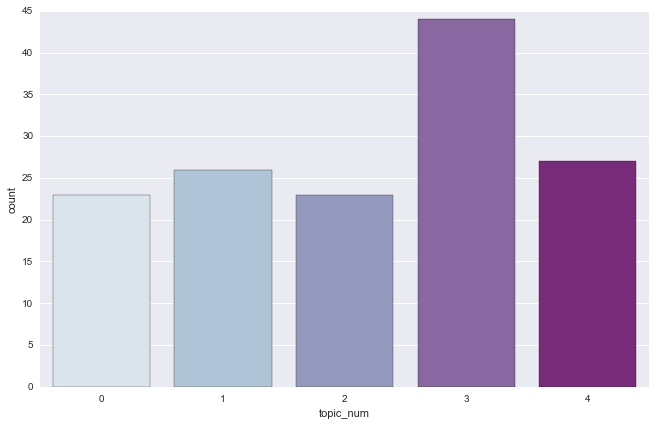

In [42]:
## plot the distribution of the performance for each topic
import seaborn as sns
topic_range = range(5)
sns.factorplot(x = 'topic_num', data = df_topic, kind = 'count', palette="BuPu", size=6, aspect=1.5, order = topic_range)